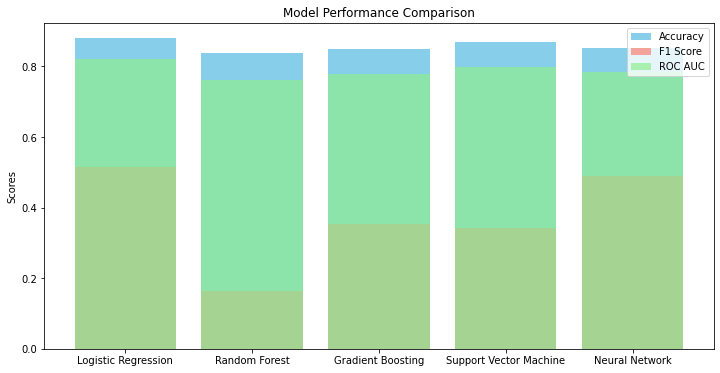

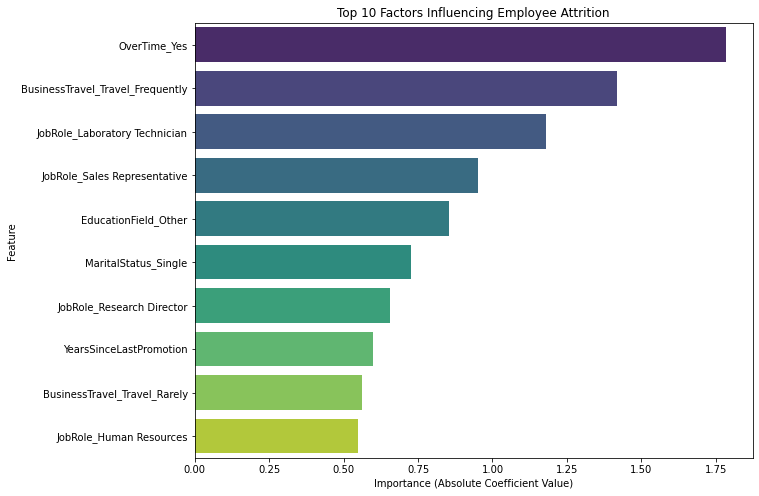

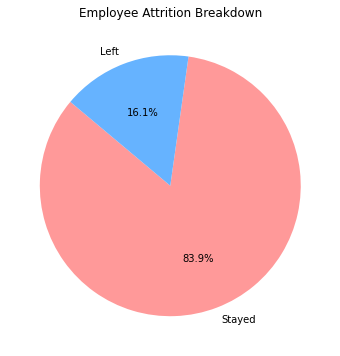

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Load the dataset
file_path = '/Users/avinishatiwari/Desktop/Kaggle/WA_Fn-UseC_-HR-Employee-Attrition 2.csv'
data = pd.read_csv(file_path)

# Encode the target variable 'Attrition'
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])

# Separate features into numerical and categorical
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features.remove('Attrition')  # Exclude target from feature list

# Encode categorical variables and scale numerical features
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Define features and target
X = data_encoded.drop(columns=['Attrition'])
y = data_encoded['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)
}

# Train and evaluate each model
model_performance = {}
accuracy_scores = []
f1_scores = []
roc_auc_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    
    # Store scores for plotting
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Plot model performance comparison
plt.figure(figsize=(12, 6))
x = list(models.keys())
plt.bar(x, accuracy_scores, color='skyblue', label='Accuracy')
plt.bar(x, f1_scores, color='salmon', label='F1 Score', alpha=0.7)
plt.bar(x, roc_auc_scores, color='lightgreen', label='ROC AUC', alpha=0.7)
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

# Select Logistic Regression and analyze feature importance
logreg = LogisticRegression(random_state=42, max_iter=200)
logreg.fit(X_train, y_train)
feature_names = X.columns
coefficients = logreg.coef_[0]

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot top 10 factors influencing attrition
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Factors Influencing Employee Attrition')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.show()

# Plot attrition breakdown
plt.figure(figsize=(6, 6))
attrition_counts = data['Attrition'].value_counts(normalize=True)
attrition_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], labels=['Stayed', 'Left'])
plt.title('Employee Attrition Breakdown')
plt.ylabel('')
plt.show()